<a href="https://colab.research.google.com/github/isabelladegen/corrclust-validation/blob/main/src/utils/hf_tooling/CSTS_HuggingFace_UsageExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSTS Dataset Explorer

This guide provides practical examples for downloading and exploring the CSTS (**C**orrelation **S**tructures in **T**ime **S**eries) dataset. It complements the documentation on [Hugging Face](https://huggingface.co/datasets/idegen/csts) by providing ready-to-run code examples for accessing different data variants and splits.

You can also use CSTS from within the github repository: https://github.com/isabelladegen/corrclust-validation for acess to all of our visualisation and validation tools as well as to generate more data.

## Setup and Dependencies

Let's first install the required dependencies.
We fixed the versions to the latest version that work. You can try the newest version but they might fail to read our complex configuration.

In [1]:
# Install required packages with version constraints to ensure it works
!pip install huggingface-hub==0.30.2
!pip install datasets==3.6.0
!pip install fsspec==2025.3.0 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.4/481.4 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.31.1
    Uninstalling huggingface-hub-0.31.1:
      Successfully uninstalled huggingface-hub-0.31.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_syst

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import datetime
import pprint as pp

## Dataset Configurations

The CSTS dataset has multiple configurations to accommodate different research questions and experiments. Each configuration follows this naming pattern:

```
<generation_stage>_<completeness_level>_<file_type>
```

Where:

**Generation Stages**:
- `raw`: Segmented but not correlated  (i.i.d. data)
- `correlated`: Data with 23 correlation patterns, normally distributed (no longer independent)
- `nonnormal`: Distribution-shifted data (no longer identically distributed)
- `downsampled`: Resampled non-normal data (1s→1min)

**Completeness Levels**:
- `complete`: 100% of the data
- `partial`: 70% of data (30% randomly dropped)
- `sparse`: 10% of data (90% randomly dropped)

**File Types**:
- `data`: Time series observations (for training)
- `labels`: Ground truth segmentation and clustering (for evaluation)
- `badclusterings_labels`: Labels with controlled clustering errors (for validation method testing)

Each configuration is available in both `exploratory` and `confirmatory` splits.

The `correlated` and `nonnormal` generation stages also include the following reduced cluster count respectivelly segment count splits (for validation method testing). The clusters/segments retained were selected at random:
- 'reduced_11_clusters_exploratory' (or '_confirmatory'): correlation pattern count 11
- 'reduced_6_clusters_exploratory' (or '_confirmatory'): correlation pattern count 6
- 'reduced_50_segments_exploratory' (or '_confirmatory'): segment count 50
- 'reduced_25_segments_exploratory' (or '_confirmatory'): segment count 25

In [9]:
# List available configurations
from datasets import get_dataset_config_names
configs = get_dataset_config_names(ds_url)
pp.pprint(configs)

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

['raw_complete_data',
 'raw_complete_labels',
 'raw_complete_badclustering_labels',
 'raw_partial_data',
 'raw_partial_labels',
 'raw_partial_badclustering_labels',
 'raw_sparse_data',
 'raw_sparse_labels',
 'raw_sparse_badclustering_labels',
 'correlated_complete_data',
 'correlated_complete_labels',
 'correlated_complete_badclustering_labels',
 'correlated_partial_data',
 'correlated_partial_labels',
 'correlated_partial_badclustering_labels',
 'correlated_sparse_data',
 'correlated_sparse_labels',
 'correlated_sparse_badclustering_labels',
 'nonnormal_complete_data',
 'nonnormal_complete_labels',
 'nonnormal_complete_badclustering_labels',
 'nonnormal_partial_data',
 'nonnormal_partial_labels',
 'nonnormal_partial_badclustering_labels',
 'nonnormal_sparse_data',
 'nonnormal_sparse_labels',
 'nonnormal_sparse_badclustering_labels',
 'downsampled_complete_data',
 'downsampled_complete_labels',
 'downsampled_complete_badclustering_labels',
 'downsampled_partial_data',
 'downsampled_par

In [10]:
# List available splits for the correlated complete data variant
from datasets import get_dataset_split_names
splits = get_dataset_split_names("idegen/csts", "correlated_complete_data")
pp.pprint(splits)

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

['exploratory',
 'confirmatory',
 'reduced_11_clusters_exploratory',
 'reduced_6_clusters_exploratory',
 'reduced_50_segments_exploratory',
 'reduced_25_segments_exploratory',
 'reduced_11_clusters_confirmatory',
 'reduced_6_clusters_confirmatory',
 'reduced_50_segments_confirmatory',
 'reduced_25_segments_confirmatory']


## 1. Working with Correlated Data

The correlated data is identically distributed but not independent. There are three variants a `complete`, `partial` and `sparse` (see Configurations for more details). In the examples we work with the `complete` data, you can simply change the configuration name to swap to e.g. `partial`.


### Load and explore the data

In [64]:
# Load the complete data from the exploratory split
complete_correlated_data = load_dataset("idegen/csts", name="correlated_complete_data", split="exploratory")

# Converting to DataFrame
complete_correlated_df = complete_correlated_data.to_pandas()
complete_correlated_df.head()

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Generating exploratory split: 0 examples [00:00, ? examples/s]

Generating confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_11_clusters_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_6_clusters_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_50_segments_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_25_segments_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_11_clusters_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_6_clusters_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_50_segments_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_25_segments_confirmatory split: 0 examples [00:00, ? examples/s]

subject_id                   datetime    iob    cob     ig
0  apricot-waterfall-16  2017-06-23 00:00:00+00:00 -0.212  1.775 -0.212
1  apricot-waterfall-16  2017-06-23 00:00:01+00:00  0.614 -0.671  0.614
2  apricot-waterfall-16  2017-06-23 00:00:02+00:00  0.363 -1.347  0.363
3  apricot-waterfall-16  2017-06-23 00:00:03+00:00 -1.006 -0.151 -1.006
4  apricot-waterfall-16  2017-06-23 00:00:04+00:00  0.660 -1.420  0.660

In [65]:
# List the exploratory subject names
complete_correlated_df["subject_id"].unique()

array(['apricot-waterfall-16', 'autumn-yogurt-18', 'blooming-glade-25',
       'breezy-leaf-30', 'chocolate-dew-10', 'copper-firebrand-7',
       'distinctive-breeze-21', 'dry-monkey-17', 'eager-tree-15',
       'earthy-yogurt-13', 'easy-waterfall-12', 'feasible-armadillo-14',
       'glorious-wave-11', 'hardy-cloud-2', 'helpful-thunder-3',
       'jolly-frog-4', 'peach-puddle-1', 'polished-meadow-6',
       'prime-yogurt-5', 'quiet-sound-8', 'scarlet-cherry-22',
       'soft-music-28', 'soft-totem-27', 'solar-meadow-29',
       'toasty-music-9', 'trim-fire-24', 'unique-puddle-26',
       'whole-pine-19', 'young-glitter-23', 'zany-planet-20'],
      dtype=object)

In [66]:
# Size of data for a single subject
subject_name = 'chocolate-dew-10'
complete_correlated_df[complete_correlated_df['subject_id'] == subject_name].shape

(1260000, 5)

### Load and explore the ground truth labels

In [67]:

# Load the corresponding ground truth labels
complete_correlated_labels = load_dataset("idegen/csts", name="correlated_complete_labels", split="exploratory")

# Convert to dataframe
complete_correlated_labels_df = complete_correlated_labels.to_pandas()
complete_correlated_labels_df.head()

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Generating exploratory split: 0 examples [00:00, ? examples/s]

Generating confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_11_clusters_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_6_clusters_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_50_segments_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_25_segments_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_11_clusters_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_6_clusters_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_50_segments_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_25_segments_confirmatory split: 0 examples [00:00, ? examples/s]

subject_id  id  start idx  end idx  length  cluster_id  \
0  apricot-waterfall-16   0          0     7199    7200           3   
1  apricot-waterfall-16   1       7200    25199   18000          19   
2  apricot-waterfall-16   2      25200    26399    1200          24   
3  apricot-waterfall-16   3      26400    33599    7200          18   
4  apricot-waterfall-16   4      33600    34799    1200          20   

  correlation to model     correlation achieved  \
0            [0, 1, 0]  [-0.005, 0.999, -0.005]   
1           [-1, 0, 1]   [-0.724, -0.09, 0.723]   
2          [-1, -1, 0]   [-0.734, -0.735, 0.12]   
3           [-1, 0, 0]        [-1.0, 0.0, -0.0]   
4          [-1, 0, -1]  [-0.737, 0.117, -0.726]   

  correlation achieved with tolerance    MAE  relaxed MAE  
0                  [True, True, True]  0.004        0.004  
1                  [True, True, True]  0.214        0.042  
2                  [True, True, True]  0.217        0.060  
3                  [True, True, True]  0.000        0.000  
4                  [True, True, True]  0.218        0.057

#### List all ideal correlation patterns

In [68]:
# Show correlation patterns for example subject
chocolate_dew_complete_corr_labels = complete_correlated_labels_df[complete_correlated_labels_df['subject_id'] == subject_name]
chocolate_dew_complete_corr_labels['correlation to model'].unique()

array(['[1, -1, 0]', '[-1, 1, 0]', '[0, 1, 1]', '[0, -1, 0]', '[0, 0, 0]',
       '[0, 0, -1]', '[-1, 1, -1]', '[-1, 0, 0]', '[1, 0, 0]',
       '[1, 1, 0]', '[0, -1, -1]', '[-1, -1, 0]', '[1, -1, -1]',
       '[-1, 0, -1]', '[1, 0, 1]', '[-1, 0, 1]', '[-1, -1, 1]',
       '[1, 0, -1]', '[1, 1, 1]', '[0, -1, 1]', '[0, 0, 1]', '[0, 1, 0]',
       '[0, 1, -1]'], dtype=object)

#### MAE stats
Here we calculate descriptive stats for a subject and for the datavariant overall

In [69]:
# MAE for specific subject
chocolate_dew_complete_corr_labels['relaxed MAE'].describe().round(3)

count    100.000
mean       0.024
std        0.021
min        0.000
25%        0.003
50%        0.030
75%        0.040
max        0.080
Name: relaxed MAE, dtype: float64

In [70]:
# Overall MAE for all 30 subjects of the complete correlated data variant
complete_correlated_labels_df['relaxed MAE'].describe().round(3)

count    3000.000
mean        0.024
std         0.020
min         0.000
25%         0.002
50%         0.029
75%         0.042
max         0.094
Name: relaxed MAE, dtype: float64

### Visualise a segment for a subject

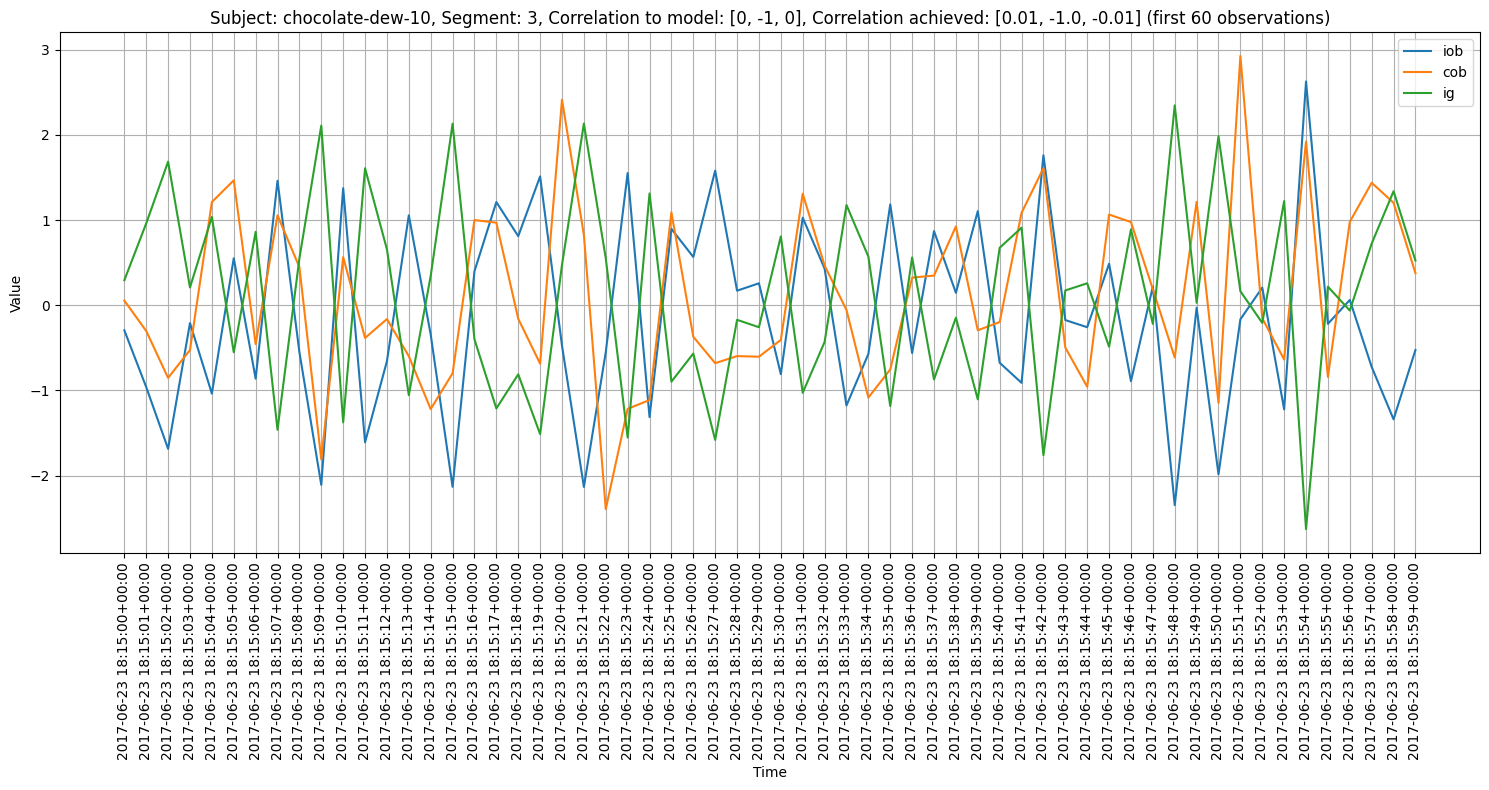

In [71]:
# Select data for a single subject
choclate_dew_complete_correlated_data = complete_correlated_df[complete_correlated_df['subject_id'] == subject_name]

# Get the first segment
segment_id = 3
start_idx = chocolate_dew_complete_corr_labels['start idx'].iloc[segment_id]
end_idx = chocolate_dew_complete_corr_labels['end idx'].iloc[segment_id]
segment_data = choclate_dew_complete_correlated_data.iloc[start_idx:end_idx+1] # you need to include the end idx
pattern = chocolate_dew_complete_corr_labels['correlation to model'].iloc[segment_id]
correlation_achieved = chocolate_dew_complete_corr_labels['correlation achieved'].iloc[segment_id]

# Check we selected all the observarions for segment 0
assert segment_data.shape[0] == chocolate_dew_complete_corr_labels['length'].iloc[segment_id], "Wrong observations selected"

# Select just a few observations
sub_segment = segment_data.iloc[:60]

# Plot the three time series variates
plt.figure(figsize=(15, 8))
plt.plot(sub_segment['datetime'], sub_segment['iob'], label='iob')
plt.plot(sub_segment['datetime'], sub_segment['cob'], label='cob')
plt.plot(sub_segment['datetime'], sub_segment['ig'], label='ig')
plt.legend()
plt.xticks(rotation=90, ha='center')
plt.title(f'Subject: {subject_name}, Segment: {segment_id}, Correlation to model: {pattern}, Correlation achieved: {correlation_achieved} (first 60 observations)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Working with Non-Normal Data

The non-normal data is no longer identically distributed and follows a segment wise stationary process. There are three data variants a `complete`, `partial` and `sparse` (see Configurations for more details). In the examples we work with the `sparse` data, you can simply change the configuration name to swap to e.g. `complete`.

### Load the data

In [52]:
# Load the sparse non-normal data variant from the exploratory split
sparse_nn_data = load_dataset("idegen/csts", name="nonnormal_sparse_data", split="exploratory")

# Convert to pandas
sparse_nn_data_df = sparse_nn_data.to_pandas()
sparse_nn_data_df.head()

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

subject_id  old id                   datetime    iob   cob  \
0  apricot-waterfall-16       2  2017-06-23 00:00:02+00:00  3.313   0.0   
1  apricot-waterfall-16      19  2017-06-23 00:00:19+00:00  9.339  13.0   
2  apricot-waterfall-16      39  2017-06-23 00:00:39+00:00  1.468   1.0   
3  apricot-waterfall-16      40  2017-06-23 00:00:40+00:00  5.578  13.0   
4  apricot-waterfall-16      54  2017-06-23 00:00:54+00:00  4.190  20.0   

        ig  
0  137.737  
1  207.139  
2  112.312  
3  165.967  
4  149.028

### Load the GT labels

In [55]:
# Load the corresponding ground truth labels
sparse_nn_labels = load_dataset("idegen/csts", name="nonnormal_sparse_labels", split="exploratory")

# Convert to dataframe
sparse_nn_labels_df = sparse_nn_labels.to_pandas()
sparse_nn_labels_df.head()

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

subject_id  id  start idx  end idx  length  cluster_id  \
0  apricot-waterfall-16   0          0      704     705           3   
1  apricot-waterfall-16   1        705     2584    1880          19   
2  apricot-waterfall-16   2       2585     2681      97          24   
3  apricot-waterfall-16   3       2682     3408     727          18   
4  apricot-waterfall-16   4       3409     3529     121          20   

  correlation to model     correlation achieved  \
0            [0, 1, 0]      [0.006, 1.0, 0.006]   
1           [-1, 0, 1]  [-0.711, -0.076, 0.717]   
2          [-1, -1, 0]   [-0.707, -0.73, 0.106]   
3           [-1, 0, 0]  [-0.997, 0.005, -0.002]   
4          [-1, 0, -1]    [-0.776, 0.2, -0.731]   

  correlation achieved with tolerance    MAE  relaxed MAE  
0                  [True, True, True]  0.004        0.004  
1                  [True, True, True]  0.216        0.031  
2                  [True, True, True]  0.223        0.046  
3                  [True, True, True]  0.003        0.003  
4                  [True, True, True]  0.231        0.099

### Visualise a segment
This is the same segment for the same subject (chocolate-dew-10) as we explored above.

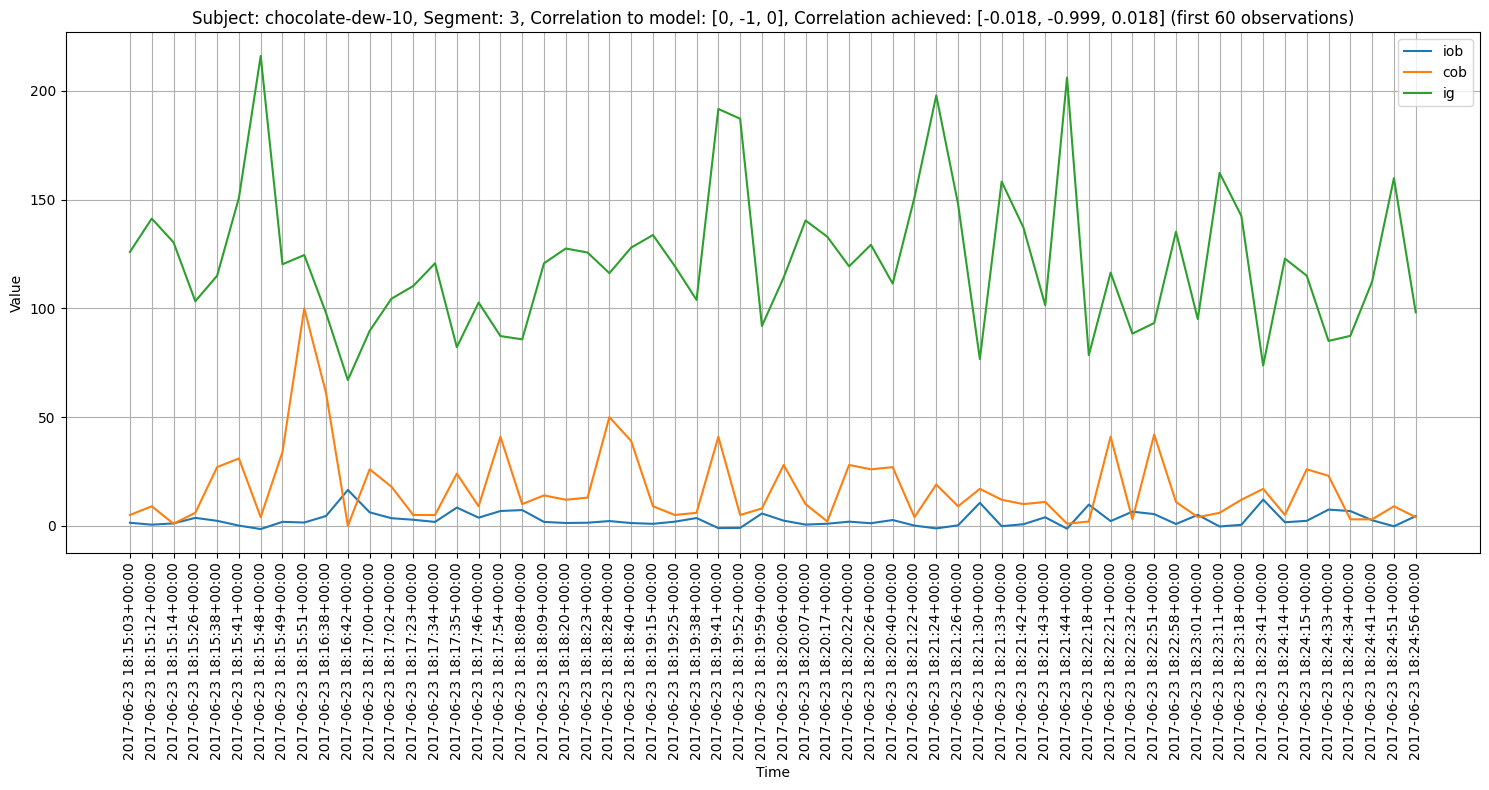

In [56]:
# Select data and labels for the same subject
choclate_dew_sparse_nn_data = sparse_nn_data_df[sparse_nn_data_df['subject_id'] == subject_name]
choclate_dew_sparse_nn_labels = sparse_nn_labels_df[sparse_nn_labels_df['subject_id'] == subject_name]

# Get the first segment
segment_id = 3
start_idx = choclate_dew_sparse_nn_labels['start idx'].iloc[segment_id]
end_idx = choclate_dew_sparse_nn_labels['end idx'].iloc[segment_id]
segment_data = choclate_dew_sparse_nn_data.iloc[start_idx:end_idx+1] # you need to include the end idx
pattern = choclate_dew_sparse_nn_labels['correlation to model'].iloc[segment_id]
correlation_achieved = choclate_dew_sparse_nn_labels['correlation achieved'].iloc[segment_id]

# Check we selected all the observarions for segment 0
assert segment_data.shape[0] == choclate_dew_sparse_nn_labels['length'].iloc[segment_id], "Wrong observations selected"

# Select just a few observations
sub_segment = segment_data.iloc[:60]

# Plot the three time series variates
plt.figure(figsize=(15, 8))
plt.plot(sub_segment['datetime'], sub_segment['iob'], label='iob')
plt.plot(sub_segment['datetime'], sub_segment['cob'], label='cob')
plt.plot(sub_segment['datetime'], sub_segment['ig'], label='ig')
plt.legend()
plt.xticks(rotation=90, ha='center')
plt.title(f'Subject: {subject_name}, Segment: {segment_id}, Correlation to model: {pattern}, Correlation achieved: {correlation_achieved} (first 60 observations)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Working with Downsampled Data

All downsampled data variants are regularly sampled with a 1 minute interval.There are the same three downsampled data variants: a `complete`, `partial` and `sparse` (see Configurations for more details). The downsampled data is created by aggregating all observations in a minute from the matching non-normal variants into a single mean observation. In the examples we work with the `sparse` data, you can simply change the configuration name to swap to e.g. `complete` data.

### Load the data

In [61]:
# Load the sparse non-normal data variant from the exploratory split
sparse_ds_data = load_dataset("idegen/csts", name="downsampled_sparse_data", split="exploratory")

# Convert to pandas
sparse_ds_data_df = sparse_ds_data.to_pandas()
sparse_ds_data_df.head()

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

subject_id                   datetime  original_index    iob  \
0  apricot-waterfall-16  2017-06-23 00:00:00+00:00             2.0  4.778   
1  apricot-waterfall-16  2017-06-23 00:01:00+00:00             7.0  3.701   
2  apricot-waterfall-16  2017-06-23 00:02:00+00:00            13.5  1.097   
3  apricot-waterfall-16  2017-06-23 00:03:00+00:00            20.5  2.048   
4  apricot-waterfall-16  2017-06-23 00:04:00+00:00            26.5  2.894   

     cob       ig  
0  9.400  154.437  
1  8.000  141.798  
2  5.125  105.267  
3  6.000  119.205  
4  4.167  130.116

### Load the GT labels

In [60]:
# Load the corresponding ground truth labels
sparse_ds_labels = load_dataset("idegen/csts", name="downsampled_sparse_labels", split="exploratory")

# Convert to dataframe
sparse_ds_labels_df = sparse_ds_labels.to_pandas()
sparse_ds_labels_df.head()

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

subject_id  id  start idx  end idx  length  cluster_id  \
0  apricot-waterfall-16   0          0      119     120           3   
1  apricot-waterfall-16   1        120      418     299          19   
2  apricot-waterfall-16   2        419      438      20          24   
3  apricot-waterfall-16   3        439      558     120          18   
4  apricot-waterfall-16   4        559      578      20          20   

  correlation to model     correlation achieved  \
0            [0, 1, 0]  [-0.008, 0.993, -0.005]   
1           [-1, 0, 1]  [-0.588, -0.147, 0.698]   
2          [-1, -1, 0]  [-0.564, -0.867, 0.359]   
3           [-1, 0, 0]  [-0.829, 0.328, -0.315]   
4          [-1, 0, -1]  [-0.901, 0.575, -0.798]   

  correlation achieved with tolerance    MAE  relaxed MAE  
0                  [True, True, True]  0.007        0.007  
1                [False, True, False]  0.287        0.090  
2                [False, True, False]  0.309        0.224  
3                [True, False, False]  0.271        0.271  
4                 [True, False, True]  0.292        0.288

### Visualise a segment

180


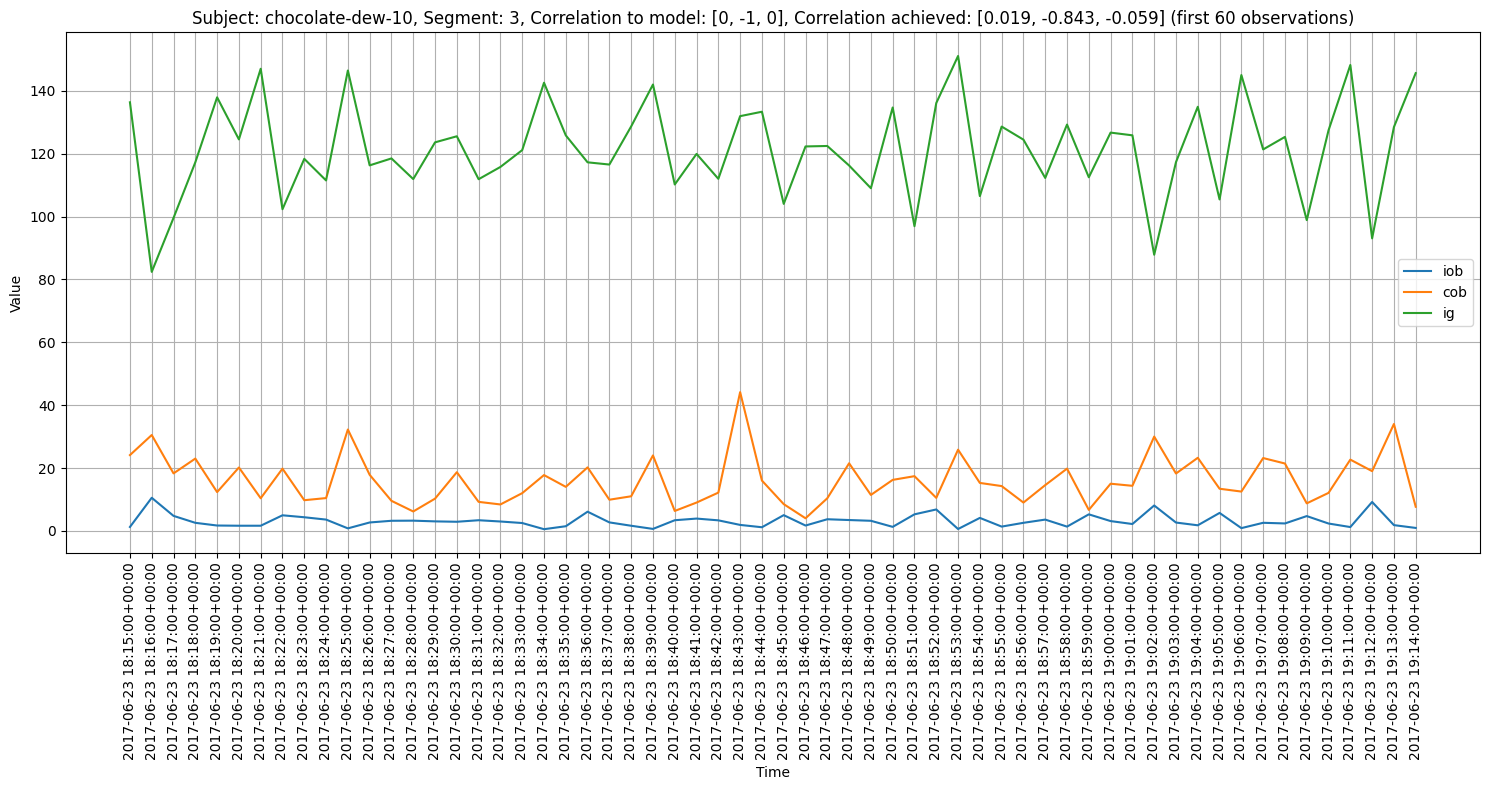

In [63]:
# Select data and labels for the same subject
choclate_dew_sparse_ds_data = sparse_ds_data_df[sparse_ds_data_df['subject_id'] == subject_name]
choclate_dew_sparse_ds_labels = sparse_ds_labels_df[sparse_ds_labels_df['subject_id'] == subject_name]

# Get the first segment
segment_id = 3
start_idx = choclate_dew_sparse_ds_labels['start idx'].iloc[segment_id]
end_idx = choclate_dew_sparse_ds_labels['end idx'].iloc[segment_id]
segment_data = choclate_dew_sparse_ds_data.iloc[start_idx:end_idx+1] # you need to include the end idx
pattern = choclate_dew_sparse_ds_labels['correlation to model'].iloc[segment_id]
correlation_achieved = choclate_dew_sparse_ds_labels['correlation achieved'].iloc[segment_id]
length= choclate_dew_sparse_ds_labels['length'].iloc[segment_id]

# Check we selected all the observarions for segment 0
assert segment_data.shape[0] == length, "Wrong observations selected"

print(length)

# Select just a few observations
sub_segment = segment_data.iloc[:60]

# Plot the three time series variates
plt.figure(figsize=(15, 8))
plt.plot(sub_segment['datetime'], sub_segment['iob'], label='iob')
plt.plot(sub_segment['datetime'], sub_segment['cob'], label='cob')
plt.plot(sub_segment['datetime'], sub_segment['ig'], label='ig')
plt.legend()
plt.xticks(rotation=90, ha='center')
plt.title(f'Subject: {subject_name}, Segment: {segment_id}, Correlation to model: {pattern}, Correlation achieved: {correlation_achieved} (first 60 observations)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Working with controlled degraded clusterings

To help assess clustering validation methods we created 66 controlled degraded clustering for each subject by introducing segmentation errors through end idx shifting and randomly assigning various wrong clusters to segments.

Here we demonstrate how to access these degraded clusterings. We work with the non-normal sparse variant but this applies to all data variants.

In [4]:
# Download the 66 degraded clustering labels as a stream (too many files otherwise)
sparse_nn_degraded_labels = load_dataset("idegen/csts", name="nonnormal_sparse_badclustering_labels", split="exploratory")


# Convert to dataframe
sparse_nn_bad_labels_df = sparse_nn_degraded_labels.to_pandas()
sparse_nn_bad_labels_df.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

jolly-frog-4-bad-labels.parquet:   0%|          | 0.00/141k [00:00<?, ?B/s]

dry-monkey-17-bad-labels.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

apricot-waterfall-16-bad-labels.parquet:   0%|          | 0.00/135k [00:00<?, ?B/s]

chocolate-dew-10-bad-labels.parquet:   0%|          | 0.00/137k [00:00<?, ?B/s]

autumn-yogurt-18-bad-labels.parquet:   0%|          | 0.00/131k [00:00<?, ?B/s]

distinctive-breeze-21-bad-labels.parquet:   0%|          | 0.00/132k [00:00<?, ?B/s]

earthy-yogurt-13-bad-labels.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

copper-firebrand-7-bad-labels.parquet:   0%|          | 0.00/133k [00:00<?, ?B/s]

glorious-wave-11-bad-labels.parquet:   0%|          | 0.00/140k [00:00<?, ?B/s]

helpful-thunder-3-bad-labels.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

easy-waterfall-12-bad-labels.parquet:   0%|          | 0.00/139k [00:00<?, ?B/s]

blooming-glade-25-bad-labels.parquet:   0%|          | 0.00/146k [00:00<?, ?B/s]

prime-yogurt-5-bad-labels.parquet:   0%|          | 0.00/143k [00:00<?, ?B/s]

peach-puddle-1-bad-labels.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

quiet-sound-8-bad-labels.parquet:   0%|          | 0.00/143k [00:00<?, ?B/s]

polished-meadow-6-bad-labels.parquet:   0%|          | 0.00/139k [00:00<?, ?B/s]

eager-tree-15-bad-labels.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

scarlet-cherry-22-bad-labels.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

breezy-leaf-30-bad-labels.parquet:   0%|          | 0.00/133k [00:00<?, ?B/s]

soft-totem-27-bad-labels.parquet:   0%|          | 0.00/149k [00:00<?, ?B/s]

feasible-armadillo-14-bad-labels.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

solar-meadow-29-bad-labels.parquet:   0%|          | 0.00/141k [00:00<?, ?B/s]

hardy-cloud-2-bad-labels.parquet:   0%|          | 0.00/132k [00:00<?, ?B/s]

toasty-music-9-bad-labels.parquet:   0%|          | 0.00/143k [00:00<?, ?B/s]

unique-puddle-26-bad-labels.parquet:   0%|          | 0.00/146k [00:00<?, ?B/s]

trim-fire-24-bad-labels.parquet:   0%|          | 0.00/137k [00:00<?, ?B/s]

whole-pine-19-bad-labels.parquet:   0%|          | 0.00/136k [00:00<?, ?B/s]

zany-planet-20-bad-labels.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

young-glitter-23-bad-labels.parquet:   0%|          | 0.00/137k [00:00<?, ?B/s]

soft-music-28-bad-labels.parquet:   0%|          | 0.00/140k [00:00<?, ?B/s]

celestial-planet-14-bad-labels.parquet:   0%|          | 0.00/139k [00:00<?, ?B/s]

chocolate-sea-18-bad-labels.parquet:   0%|          | 0.00/135k [00:00<?, ?B/s]

iconic-hill-25-bad-labels.parquet:   0%|          | 0.00/135k [00:00<?, ?B/s]

likely-darkness-16-bad-labels.parquet:   0%|          | 0.00/140k [00:00<?, ?B/s]

golden-moon-4-bad-labels.parquet:   0%|          | 0.00/141k [00:00<?, ?B/s]

fanciful-deluge-13-bad-labels.parquet:   0%|          | 0.00/147k [00:00<?, ?B/s]

ancient-morning-17-bad-labels.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

cool-dream-8-bad-labels.parquet:   0%|          | 0.00/136k [00:00<?, ?B/s]

dandy-field-1-bad-labels.parquet:   0%|          | 0.00/135k [00:00<?, ?B/s]

dashing-glitter-5-bad-labels.parquet:   0%|          | 0.00/147k [00:00<?, ?B/s]

absurd-morning-10-bad-labels.parquet:   0%|          | 0.00/136k [00:00<?, ?B/s]

faithful-hill-15-bad-labels.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

decent-firebrand-29-bad-labels.parquet:   0%|          | 0.00/135k [00:00<?, ?B/s]

cerulean-deluge-19-bad-labels.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

firm-morning-12-bad-labels.parquet:   0%|          | 0.00/138k [00:00<?, ?B/s]

atomic-bee-23-bad-labels.parquet:   0%|          | 0.00/138k [00:00<?, ?B/s]

rose-valley-30-bad-labels.parquet:   0%|          | 0.00/138k [00:00<?, ?B/s]

soft-donkey-26-bad-labels.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

soft-dawn-2-bad-labels.parquet:   0%|          | 0.00/132k [00:00<?, ?B/s]

skilled-disco-20-bad-labels.parquet:   0%|          | 0.00/144k [00:00<?, ?B/s]

youthful-star-3-bad-labels.parquet:   0%|          | 0.00/145k [00:00<?, ?B/s]

stellar-star-6-bad-labels.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

whole-plasma-27-bad-labels.parquet:   0%|          | 0.00/150k [00:00<?, ?B/s]

visionary-wood-28-bad-labels.parquet:   0%|          | 0.00/141k [00:00<?, ?B/s]

smooth-energy-22-bad-labels.parquet:   0%|          | 0.00/133k [00:00<?, ?B/s]

magic-breeze-7-bad-labels.parquet:   0%|          | 0.00/133k [00:00<?, ?B/s]

wandering-sound-21-bad-labels.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

zany-night-24-bad-labels.parquet:   0%|          | 0.00/138k [00:00<?, ?B/s]

trim-glade-11-bad-labels.parquet:   0%|          | 0.00/137k [00:00<?, ?B/s]

ruby-snowball-9-bad-labels.parquet:   0%|          | 0.00/143k [00:00<?, ?B/s]

apricot-waterfall-16-bad-labels.parquet:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

easy-waterfall-12-bad-labels.parquet:   0%|          | 0.00/70.3k [00:00<?, ?B/s]

feasible-armadillo-14-bad-labels.parquet:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

glorious-wave-11-bad-labels.parquet:   0%|          | 0.00/70.8k [00:00<?, ?B/s]

blooming-glade-25-bad-labels.parquet:   0%|          | 0.00/77.4k [00:00<?, ?B/s]

dry-monkey-17-bad-labels.parquet:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

hardy-cloud-2-bad-labels.parquet:   0%|          | 0.00/70.5k [00:00<?, ?B/s]

earthy-yogurt-13-bad-labels.parquet:   0%|          | 0.00/73.6k [00:00<?, ?B/s]

copper-firebrand-7-bad-labels.parquet:   0%|          | 0.00/76.4k [00:00<?, ?B/s]

helpful-thunder-3-bad-labels.parquet:   0%|          | 0.00/72.5k [00:00<?, ?B/s]

autumn-yogurt-18-bad-labels.parquet:   0%|          | 0.00/67.0k [00:00<?, ?B/s]

distinctive-breeze-21-bad-labels.parquet:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

chocolate-dew-10-bad-labels.parquet:   0%|          | 0.00/70.6k [00:00<?, ?B/s]

jolly-frog-4-bad-labels.parquet:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

breezy-leaf-30-bad-labels.parquet:   0%|          | 0.00/71.5k [00:00<?, ?B/s]

eager-tree-15-bad-labels.parquet:   0%|          | 0.00/72.5k [00:00<?, ?B/s]

peach-puddle-1-bad-labels.parquet:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

polished-meadow-6-bad-labels.parquet:   0%|          | 0.00/75.8k [00:00<?, ?B/s]

soft-totem-27-bad-labels.parquet:   0%|          | 0.00/73.0k [00:00<?, ?B/s]

soft-music-28-bad-labels.parquet:   0%|          | 0.00/69.3k [00:00<?, ?B/s]

young-glitter-23-bad-labels.parquet:   0%|          | 0.00/75.9k [00:00<?, ?B/s]

quiet-sound-8-bad-labels.parquet:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

prime-yogurt-5-bad-labels.parquet:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

zany-planet-20-bad-labels.parquet:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

solar-meadow-29-bad-labels.parquet:   0%|          | 0.00/70.7k [00:00<?, ?B/s]

whole-pine-19-bad-labels.parquet:   0%|          | 0.00/73.4k [00:00<?, ?B/s]

toasty-music-9-bad-labels.parquet:   0%|          | 0.00/74.2k [00:00<?, ?B/s]

unique-puddle-26-bad-labels.parquet:   0%|          | 0.00/69.2k [00:00<?, ?B/s]

trim-fire-24-bad-labels.parquet:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

scarlet-cherry-22-bad-labels.parquet:   0%|          | 0.00/71.4k [00:00<?, ?B/s]

breezy-leaf-30-bad-labels.parquet:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

distinctive-breeze-21-bad-labels.parquet:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

earthy-yogurt-13-bad-labels.parquet:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

chocolate-dew-10-bad-labels.parquet:   0%|          | 0.00/43.7k [00:00<?, ?B/s]

glorious-wave-11-bad-labels.parquet:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

feasible-armadillo-14-bad-labels.parquet:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

jolly-frog-4-bad-labels.parquet:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

eager-tree-15-bad-labels.parquet:   0%|          | 0.00/44.9k [00:00<?, ?B/s]

autumn-yogurt-18-bad-labels.parquet:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

hardy-cloud-2-bad-labels.parquet:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

blooming-glade-25-bad-labels.parquet:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

easy-waterfall-12-bad-labels.parquet:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

copper-firebrand-7-bad-labels.parquet:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

dry-monkey-17-bad-labels.parquet:   0%|          | 0.00/44.5k [00:00<?, ?B/s]

helpful-thunder-3-bad-labels.parquet:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

peach-puddle-1-bad-labels.parquet:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

apricot-waterfall-16-bad-labels.parquet:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

whole-pine-19-bad-labels.parquet:   0%|          | 0.00/45.1k [00:00<?, ?B/s]

quiet-sound-8-bad-labels.parquet:   0%|          | 0.00/44.5k [00:00<?, ?B/s]

scarlet-cherry-22-bad-labels.parquet:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

soft-music-28-bad-labels.parquet:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

solar-meadow-29-bad-labels.parquet:   0%|          | 0.00/45.7k [00:00<?, ?B/s]

prime-yogurt-5-bad-labels.parquet:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

young-glitter-23-bad-labels.parquet:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

zany-planet-20-bad-labels.parquet:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

trim-fire-24-bad-labels.parquet:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

toasty-music-9-bad-labels.parquet:   0%|          | 0.00/46.9k [00:00<?, ?B/s]

soft-totem-27-bad-labels.parquet:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

unique-puddle-26-bad-labels.parquet:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

polished-meadow-6-bad-labels.parquet:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

dry-monkey-17-bad-labels.parquet:   0%|          | 0.00/77.2k [00:00<?, ?B/s]

breezy-leaf-30-bad-labels.parquet:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

autumn-yogurt-18-bad-labels.parquet:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

eager-tree-15-bad-labels.parquet:   0%|          | 0.00/76.4k [00:00<?, ?B/s]

feasible-armadillo-14-bad-labels.parquet:   0%|          | 0.00/80.8k [00:00<?, ?B/s]

hardy-cloud-2-bad-labels.parquet:   0%|          | 0.00/72.1k [00:00<?, ?B/s]

helpful-thunder-3-bad-labels.parquet:   0%|          | 0.00/78.9k [00:00<?, ?B/s]

blooming-glade-25-bad-labels.parquet:   0%|          | 0.00/77.7k [00:00<?, ?B/s]

earthy-yogurt-13-bad-labels.parquet:   0%|          | 0.00/78.3k [00:00<?, ?B/s]

distinctive-breeze-21-bad-labels.parquet:   0%|          | 0.00/76.1k [00:00<?, ?B/s]

glorious-wave-11-bad-labels.parquet:   0%|          | 0.00/76.8k [00:00<?, ?B/s]

easy-waterfall-12-bad-labels.parquet:   0%|          | 0.00/76.1k [00:00<?, ?B/s]

chocolate-dew-10-bad-labels.parquet:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

jolly-frog-4-bad-labels.parquet:   0%|          | 0.00/80.8k [00:00<?, ?B/s]

apricot-waterfall-16-bad-labels.parquet:   0%|          | 0.00/75.5k [00:00<?, ?B/s]

copper-firebrand-7-bad-labels.parquet:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

polished-meadow-6-bad-labels.parquet:   0%|          | 0.00/77.4k [00:00<?, ?B/s]

peach-puddle-1-bad-labels.parquet:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

quiet-sound-8-bad-labels.parquet:   0%|          | 0.00/79.3k [00:00<?, ?B/s]

toasty-music-9-bad-labels.parquet:   0%|          | 0.00/80.8k [00:00<?, ?B/s]

soft-music-28-bad-labels.parquet:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

prime-yogurt-5-bad-labels.parquet:   0%|          | 0.00/80.7k [00:00<?, ?B/s]

soft-totem-27-bad-labels.parquet:   0%|          | 0.00/77.9k [00:00<?, ?B/s]

whole-pine-19-bad-labels.parquet:   0%|          | 0.00/76.1k [00:00<?, ?B/s]

young-glitter-23-bad-labels.parquet:   0%|          | 0.00/73.6k [00:00<?, ?B/s]

scarlet-cherry-22-bad-labels.parquet:   0%|          | 0.00/74.6k [00:00<?, ?B/s]

solar-meadow-29-bad-labels.parquet:   0%|          | 0.00/79.4k [00:00<?, ?B/s]

trim-fire-24-bad-labels.parquet:   0%|          | 0.00/75.5k [00:00<?, ?B/s]

unique-puddle-26-bad-labels.parquet:   0%|          | 0.00/74.7k [00:00<?, ?B/s]

zany-planet-20-bad-labels.parquet:   0%|          | 0.00/78.1k [00:00<?, ?B/s]

feasible-armadillo-14-bad-labels.parquet:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

earthy-yogurt-13-bad-labels.parquet:   0%|          | 0.00/46.0k [00:00<?, ?B/s]

hardy-cloud-2-bad-labels.parquet:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

glorious-wave-11-bad-labels.parquet:   0%|          | 0.00/43.5k [00:00<?, ?B/s]

jolly-frog-4-bad-labels.parquet:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

apricot-waterfall-16-bad-labels.parquet:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

dry-monkey-17-bad-labels.parquet:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

copper-firebrand-7-bad-labels.parquet:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

breezy-leaf-30-bad-labels.parquet:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

blooming-glade-25-bad-labels.parquet:   0%|          | 0.00/43.6k [00:00<?, ?B/s]

helpful-thunder-3-bad-labels.parquet:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

eager-tree-15-bad-labels.parquet:   0%|          | 0.00/44.2k [00:00<?, ?B/s]

easy-waterfall-12-bad-labels.parquet:   0%|          | 0.00/41.2k [00:00<?, ?B/s]

distinctive-breeze-21-bad-labels.parquet:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

autumn-yogurt-18-bad-labels.parquet:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

chocolate-dew-10-bad-labels.parquet:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

polished-meadow-6-bad-labels.parquet:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

peach-puddle-1-bad-labels.parquet:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

scarlet-cherry-22-bad-labels.parquet:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

solar-meadow-29-bad-labels.parquet:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

prime-yogurt-5-bad-labels.parquet:   0%|          | 0.00/44.2k [00:00<?, ?B/s]

soft-totem-27-bad-labels.parquet:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

unique-puddle-26-bad-labels.parquet:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

trim-fire-24-bad-labels.parquet:   0%|          | 0.00/43.2k [00:00<?, ?B/s]

quiet-sound-8-bad-labels.parquet:   0%|          | 0.00/42.4k [00:00<?, ?B/s]

soft-music-28-bad-labels.parquet:   0%|          | 0.00/44.3k [00:00<?, ?B/s]

toasty-music-9-bad-labels.parquet:   0%|          | 0.00/44.4k [00:00<?, ?B/s]

whole-pine-19-bad-labels.parquet:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

young-glitter-23-bad-labels.parquet:   0%|          | 0.00/43.2k [00:00<?, ?B/s]

zany-planet-20-bad-labels.parquet:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

ancient-morning-17-bad-labels.parquet:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

atomic-bee-23-bad-labels.parquet:   0%|          | 0.00/74.3k [00:00<?, ?B/s]

faithful-hill-15-bad-labels.parquet:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

cerulean-deluge-19-bad-labels.parquet:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

chocolate-sea-18-bad-labels.parquet:   0%|          | 0.00/67.8k [00:00<?, ?B/s]

cool-dream-8-bad-labels.parquet:   0%|          | 0.00/68.3k [00:00<?, ?B/s]

firm-morning-12-bad-labels.parquet:   0%|          | 0.00/72.5k [00:00<?, ?B/s]

iconic-hill-25-bad-labels.parquet:   0%|          | 0.00/68.6k [00:00<?, ?B/s]

fanciful-deluge-13-bad-labels.parquet:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

absurd-morning-10-bad-labels.parquet:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

dashing-glitter-5-bad-labels.parquet:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

dandy-field-1-bad-labels.parquet:   0%|          | 0.00/69.1k [00:00<?, ?B/s]

celestial-planet-14-bad-labels.parquet:   0%|          | 0.00/75.8k [00:00<?, ?B/s]

decent-firebrand-29-bad-labels.parquet:   0%|          | 0.00/69.3k [00:00<?, ?B/s]

golden-moon-4-bad-labels.parquet:   0%|          | 0.00/76.4k [00:00<?, ?B/s]

likely-darkness-16-bad-labels.parquet:   0%|          | 0.00/72.3k [00:00<?, ?B/s]

rose-valley-30-bad-labels.parquet:   0%|          | 0.00/72.6k [00:00<?, ?B/s]

wandering-sound-21-bad-labels.parquet:   0%|          | 0.00/67.2k [00:00<?, ?B/s]

whole-plasma-27-bad-labels.parquet:   0%|          | 0.00/76.2k [00:00<?, ?B/s]

soft-donkey-26-bad-labels.parquet:   0%|          | 0.00/74.7k [00:00<?, ?B/s]

visionary-wood-28-bad-labels.parquet:   0%|          | 0.00/72.1k [00:00<?, ?B/s]

skilled-disco-20-bad-labels.parquet:   0%|          | 0.00/76.6k [00:00<?, ?B/s]

magic-breeze-7-bad-labels.parquet:   0%|          | 0.00/72.1k [00:00<?, ?B/s]

ruby-snowball-9-bad-labels.parquet:   0%|          | 0.00/77.2k [00:00<?, ?B/s]

stellar-star-6-bad-labels.parquet:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

soft-dawn-2-bad-labels.parquet:   0%|          | 0.00/73.4k [00:00<?, ?B/s]

smooth-energy-22-bad-labels.parquet:   0%|          | 0.00/68.4k [00:00<?, ?B/s]

zany-night-24-bad-labels.parquet:   0%|          | 0.00/72.1k [00:00<?, ?B/s]

youthful-star-3-bad-labels.parquet:   0%|          | 0.00/76.8k [00:00<?, ?B/s]

trim-glade-11-bad-labels.parquet:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

atomic-bee-23-bad-labels.parquet:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

cerulean-deluge-19-bad-labels.parquet:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

decent-firebrand-29-bad-labels.parquet:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

absurd-morning-10-bad-labels.parquet:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

faithful-hill-15-bad-labels.parquet:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

dandy-field-1-bad-labels.parquet:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

celestial-planet-14-bad-labels.parquet:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

iconic-hill-25-bad-labels.parquet:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

firm-morning-12-bad-labels.parquet:   0%|          | 0.00/45.5k [00:00<?, ?B/s]

fanciful-deluge-13-bad-labels.parquet:   0%|          | 0.00/44.8k [00:00<?, ?B/s]

chocolate-sea-18-bad-labels.parquet:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

dashing-glitter-5-bad-labels.parquet:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

golden-moon-4-bad-labels.parquet:   0%|          | 0.00/45.5k [00:00<?, ?B/s]

likely-darkness-16-bad-labels.parquet:   0%|          | 0.00/40.2k [00:00<?, ?B/s]

ancient-morning-17-bad-labels.parquet:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

cool-dream-8-bad-labels.parquet:   0%|          | 0.00/44.4k [00:00<?, ?B/s]

soft-donkey-26-bad-labels.parquet:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

rose-valley-30-bad-labels.parquet:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

smooth-energy-22-bad-labels.parquet:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

ruby-snowball-9-bad-labels.parquet:   0%|          | 0.00/42.4k [00:00<?, ?B/s]

soft-dawn-2-bad-labels.parquet:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

magic-breeze-7-bad-labels.parquet:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

skilled-disco-20-bad-labels.parquet:   0%|          | 0.00/45.2k [00:00<?, ?B/s]

whole-plasma-27-bad-labels.parquet:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

zany-night-24-bad-labels.parquet:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

visionary-wood-28-bad-labels.parquet:   0%|          | 0.00/44.6k [00:00<?, ?B/s]

trim-glade-11-bad-labels.parquet:   0%|          | 0.00/41.1k [00:00<?, ?B/s]

youthful-star-3-bad-labels.parquet:   0%|          | 0.00/44.6k [00:00<?, ?B/s]

stellar-star-6-bad-labels.parquet:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

wandering-sound-21-bad-labels.parquet:   0%|          | 0.00/41.8k [00:00<?, ?B/s]

chocolate-sea-18-bad-labels.parquet:   0%|          | 0.00/75.3k [00:00<?, ?B/s]

decent-firebrand-29-bad-labels.parquet:   0%|          | 0.00/78.3k [00:00<?, ?B/s]

cerulean-deluge-19-bad-labels.parquet:   0%|          | 0.00/76.4k [00:00<?, ?B/s]

ancient-morning-17-bad-labels.parquet:   0%|          | 0.00/77.0k [00:00<?, ?B/s]

iconic-hill-25-bad-labels.parquet:   0%|          | 0.00/76.0k [00:00<?, ?B/s]

faithful-hill-15-bad-labels.parquet:   0%|          | 0.00/79.1k [00:00<?, ?B/s]

cool-dream-8-bad-labels.parquet:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

golden-moon-4-bad-labels.parquet:   0%|          | 0.00/79.1k [00:00<?, ?B/s]

dandy-field-1-bad-labels.parquet:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

absurd-morning-10-bad-labels.parquet:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

dashing-glitter-5-bad-labels.parquet:   0%|          | 0.00/79.5k [00:00<?, ?B/s]

atomic-bee-23-bad-labels.parquet:   0%|          | 0.00/75.5k [00:00<?, ?B/s]

celestial-planet-14-bad-labels.parquet:   0%|          | 0.00/77.9k [00:00<?, ?B/s]

firm-morning-12-bad-labels.parquet:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

likely-darkness-16-bad-labels.parquet:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

fanciful-deluge-13-bad-labels.parquet:   0%|          | 0.00/82.4k [00:00<?, ?B/s]

magic-breeze-7-bad-labels.parquet:   0%|          | 0.00/75.6k [00:00<?, ?B/s]

visionary-wood-28-bad-labels.parquet:   0%|          | 0.00/78.3k [00:00<?, ?B/s]

stellar-star-6-bad-labels.parquet:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

smooth-energy-22-bad-labels.parquet:   0%|          | 0.00/74.9k [00:00<?, ?B/s]

ruby-snowball-9-bad-labels.parquet:   0%|          | 0.00/78.7k [00:00<?, ?B/s]

whole-plasma-27-bad-labels.parquet:   0%|          | 0.00/78.1k [00:00<?, ?B/s]

soft-donkey-26-bad-labels.parquet:   0%|          | 0.00/78.8k [00:00<?, ?B/s]

youthful-star-3-bad-labels.parquet:   0%|          | 0.00/78.2k [00:00<?, ?B/s]

rose-valley-30-bad-labels.parquet:   0%|          | 0.00/77.0k [00:00<?, ?B/s]

skilled-disco-20-bad-labels.parquet:   0%|          | 0.00/79.7k [00:00<?, ?B/s]

trim-glade-11-bad-labels.parquet:   0%|          | 0.00/75.7k [00:00<?, ?B/s]

zany-night-24-bad-labels.parquet:   0%|          | 0.00/76.4k [00:00<?, ?B/s]

wandering-sound-21-bad-labels.parquet:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

soft-dawn-2-bad-labels.parquet:   0%|          | 0.00/73.5k [00:00<?, ?B/s]

celestial-planet-14-bad-labels.parquet:   0%|          | 0.00/43.5k [00:00<?, ?B/s]

golden-moon-4-bad-labels.parquet:   0%|          | 0.00/45.0k [00:00<?, ?B/s]

absurd-morning-10-bad-labels.parquet:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

dandy-field-1-bad-labels.parquet:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

cool-dream-8-bad-labels.parquet:   0%|          | 0.00/43.2k [00:00<?, ?B/s]

iconic-hill-25-bad-labels.parquet:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

firm-morning-12-bad-labels.parquet:   0%|          | 0.00/42.4k [00:00<?, ?B/s]

decent-firebrand-29-bad-labels.parquet:   0%|          | 0.00/44.8k [00:00<?, ?B/s]

atomic-bee-23-bad-labels.parquet:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

ancient-morning-17-bad-labels.parquet:   0%|          | 0.00/43.7k [00:00<?, ?B/s]

fanciful-deluge-13-bad-labels.parquet:   0%|          | 0.00/43.7k [00:00<?, ?B/s]

chocolate-sea-18-bad-labels.parquet:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

likely-darkness-16-bad-labels.parquet:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

faithful-hill-15-bad-labels.parquet:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

dashing-glitter-5-bad-labels.parquet:   0%|          | 0.00/43.5k [00:00<?, ?B/s]

cerulean-deluge-19-bad-labels.parquet:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

visionary-wood-28-bad-labels.parquet:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

stellar-star-6-bad-labels.parquet:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

whole-plasma-27-bad-labels.parquet:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

trim-glade-11-bad-labels.parquet:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

soft-donkey-26-bad-labels.parquet:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

wandering-sound-21-bad-labels.parquet:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

zany-night-24-bad-labels.parquet:   0%|          | 0.00/43.5k [00:00<?, ?B/s]

skilled-disco-20-bad-labels.parquet:   0%|          | 0.00/45.7k [00:00<?, ?B/s]

youthful-star-3-bad-labels.parquet:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

soft-dawn-2-bad-labels.parquet:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

smooth-energy-22-bad-labels.parquet:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

rose-valley-30-bad-labels.parquet:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

magic-breeze-7-bad-labels.parquet:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

ruby-snowball-9-bad-labels.parquet:   0%|          | 0.00/45.7k [00:00<?, ?B/s]

Generating exploratory split: 0 examples [00:00, ? examples/s]

Generating confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_11_clusters_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_6_clusters_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_50_segments_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_25_segments_exploratory split: 0 examples [00:00, ? examples/s]

Generating reduced_11_clusters_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_6_clusters_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_50_segments_confirmatory split: 0 examples [00:00, ? examples/s]

Generating reduced_25_segments_confirmatory split: 0 examples [00:00, ? examples/s]

subject_id    clustering_desc  id  start idx  end idx  length  \
0  apricot-waterfall-16  shifted-end-idx-9   0          0      747     748   
1  apricot-waterfall-16  shifted-end-idx-9   1        748     2627    1880   
2  apricot-waterfall-16  shifted-end-idx-9   2       2628     2724      97   
3  apricot-waterfall-16  shifted-end-idx-9   3       2725     3451     727   
4  apricot-waterfall-16  shifted-end-idx-9   4       3452     3572     121   

   cluster_id correlation to model     correlation achieved  \
0           3            [0, 1, 0]   [-0.042, 0.928, 0.057]   
1          19           [-1, 0, 1]   [-0.71, -0.091, 0.706]   
2          24          [-1, -1, 0]  [-0.823, -0.519, 0.166]   
3          18           [-1, 0, 0]  [-0.981, 0.031, -0.063]   
4          20          [-1, 0, -1]  [-0.474, 0.455, -0.738]   

  correlation achieved with tolerance    MAE  relaxed MAE  
0                  [True, True, True]  0.057        0.057  
1                  [True, True, True]  0.225        0.032  
2                 [True, False, True]  0.275        0.153  
3                  [True, True, True]  0.038        0.038  
4                [False, False, True]  0.414        0.243

### List different clustering quality
This lists them accross all subjects

They are a mix of:
1. shifting the end indxe by a randomly picked number of obs
2. assigining a random wrong cluster to a randomly picked number of obs
3. combination of the two

We ensure that the degraded clusterings span the full Jaccard index.

In [5]:
# List the 66 different qualtiy clusterings
sparse_nn_bad_labels_df['clustering_desc'].unique()

array(['shifted-end-idx-9', 'shifted-and-wrong-cluster-0',
       'shifted-end-idx-15', 'shifted-and-wrong-cluster-8',
       'shifted-end-idx-1', 'shifted-end-idx-12',
       'shifted-and-wrong-cluster-7', 'shifted-end-idx-6',
       'shifted-and-wrong-cluster-21', 'shifted-and-wrong-cluster-20',
       'shifted-end-idx-7', 'shifted-and-wrong-cluster-6',
       'shifted-end-idx-13', 'shifted-end-idx-0',
       'shifted-and-wrong-cluster-9', 'shifted-end-idx-14',
       'shifted-and-wrong-cluster-1', 'shifted-end-idx-8',
       'shifted-end-idx-2', 'wrong-clusters-21',
       'shifted-and-wrong-cluster-3', 'shifted-end-idx-16',
       'shifted-end-idx-5', 'shifted-end-idx-19', 'shifted-end-idx-11',
       'shifted-and-wrong-cluster-4', 'shifted-and-wrong-cluster-5',
       'shifted-end-idx-10', 'shifted-end-idx-18', 'shifted-end-idx-4',
       'wrong-clusters-20', 'shifted-end-idx-17',
       'shifted-and-wrong-cluster-2', 'shifted-end-idx-3',
       'wrong-clusters-14', 'wrong-cluster

### Explore a bad qualy clustering for a subject
Here we look at just one subject (chocolate-dew-10). We find the one with the worst MAE and demonstrate how it compares to the ground truth.

In [13]:
# Find the worst clustering (by MAE) for a subject
subject_name = 'chocolate-dew-10'

# Find all bad clusterings for the subject
choc_bad_clusterings = sparse_nn_bad_labels_df[sparse_nn_bad_labels_df['subject_id'] == subject_name]

# Group by different quality clusterings and calculate mean MAE for each clustering
mean_mae_by_clustering = choc_bad_clusterings.groupby('clustering_desc')['relaxed MAE'].mean().reset_index()

# Find the clustering description with the highest mean MAE
worst_desc_choc = mean_mae_by_clustering.sort_values(by='relaxed MAE', ascending=False).iloc[0]['clustering_desc']

# Select the 'labels file' for that clustering (we reset the index to make it match the segment id)
choc_worst_clustering_df = choc_bad_clusterings[choc_bad_clusterings['clustering_desc'] == worst_desc_choc].reset_index(drop=True)

choc_worst_clustering_df.head()

subject_id    clustering_desc  id  start idx  end idx  length  \
0  chocolate-dew-10  wrong-clusters-21   0          0      104     105   
1  chocolate-dew-10  wrong-clusters-21   1        105     3005    2901   
2  chocolate-dew-10  wrong-clusters-21   2       3006     6660    3655   
3  chocolate-dew-10  wrong-clusters-21   3       6661     7700    1040   
4  chocolate-dew-10  wrong-clusters-21   4       7701     7860     160   

   cluster_id correlation to model     correlation achieved  \
0          20          [-1, 0, -1]   [0.676, -0.78, -0.127]   
1          12            [1, 1, 0]   [-0.713, 0.74, -0.101]   
2           1            [0, 0, 1]     [0.09, 0.731, 0.714]   
3          24          [-1, -1, 0]  [-0.018, -0.999, 0.018]   
4           2           [0, 0, -1]    [0.089, -0.14, 0.008]   

  correlation achieved with tolerance    MAE  relaxed MAE  
0               [False, False, False]  1.110        0.913  
1                  [True, True, True]  0.691        0.521  
2                 [True, False, True]  0.369        0.369  
3                 [False, True, True]  0.334        0.336  
4                 [True, True, False]  0.412        0.412

#### Download ground truth labels

In [11]:
# Find the ground truth for that subject, same data variant for comparision
sparse_ds_labels = load_dataset("idegen/csts", name="nonnormal_sparse_labels", split="exploratory")

# Filter for the subject
choc_gt_labels = sparse_ds_labels.filter(lambda example: example["subject_id"] == subject_name)

# Convert to dataframe
choc_gt_labels_df = choc_gt_labels.to_pandas()
choc_gt_labels_df.head()

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Filter:   0%|          | 0/3000 [00:00<?, ? examples/s]

subject_id  id  start idx  end idx  length  cluster_id  \
0  chocolate-dew-10   0          0      104     105          15   
1  chocolate-dew-10   1        105     3005    2901          21   
2  chocolate-dew-10   2       3006     6660    3655           4   
3  chocolate-dew-10   3       6661     7700    1040           6   
4  chocolate-dew-10   4       7701     7860     160           0   

  correlation to model     correlation achieved  \
0           [1, -1, 0]   [0.676, -0.78, -0.127]   
1           [-1, 1, 0]   [-0.713, 0.74, -0.101]   
2            [0, 1, 1]     [0.09, 0.731, 0.714]   
3           [0, -1, 0]  [-0.018, -0.999, 0.018]   
4            [0, 0, 0]    [0.089, -0.14, 0.008]   

  correlation achieved with tolerance    MAE  relaxed MAE  
0                 [False, True, True]  0.224        0.080  
1                  [True, True, True]  0.216        0.048  
2                  [True, True, True]  0.215        0.042  
3                  [True, True, True]  0.012        0.012  
4                  [True, True, True]  0.079        0.079

#### Compare differences
- Observations shifted
- Number of Clusters wrongly assigned
- Differences in MAE

In [19]:
# Compare differences
gt_end_idx = choc_gt_labels_df['end idx'].iloc[0]
worst_clust_end_idx = choc_worst_clustering_df['end idx'].iloc[0]

# Calculate observations shifted
obs_shifted = worst_clust_end_idx - gt_end_idx

# Calculate wrongly assigned clusters
n_wrong_clusters = (choc_gt_labels_df['cluster_id'] != choc_worst_clustering_df['cluster_id']).sum()

# Compare MAE differences between dfs
# Calculate describe for each dataframe
describe_worst_clust = choc_worst_clustering_df['relaxed MAE'].describe().round(3)
describe_gt_clust = choc_gt_labels_df['relaxed MAE'].describe().round(3)

# Combine results
combined_describe_df = combined_describ_df = pd.DataFrame({
    'Worst': describe_worst_clust,
    'GT': describe_gt_clust
})

# Print summary
print(f'Observations shifted: {obs_shifted}')
print(f'# Wrong Clusters: {n_wrong_clusters}')
combined_describe_df

Observations shifted: 0
# Wrong Clusters: 100


Worst       GT
count  100.000  100.000
mean     0.772    0.031
std      0.322    0.025
min      0.329    0.001
25%      0.491    0.009
50%      0.802    0.028
75%      0.945    0.048
max      1.469    0.090